# Social Network Ads 

### Aim:
- To predict which customers are more likely to purchase Social Network Ads. 

Here, the dependent variable is ‘Purchased’ where 1 = Customer has purchased the 
Social Network Ad and 0 = Customer has not purchased the Social Network Ad.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Lets describe the data
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


- By looking at describe we conclude that minimum age to purchased add is 18 years and max age of customer who bought the   socail add is 60 years.
- The minimum salary is 15000 and max salary is 150000

In [4]:
# lets check for missing values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
# lets check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
# Lets see the each column in data
#df['User ID'].unique() - we will drop this column

In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [9]:
# so we will drop the 'User id 'column
df.drop(['User ID'], inplace=True,axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### EDA
- Univariate analysis
- Bivariate analysis

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchased', ylabel='count'>

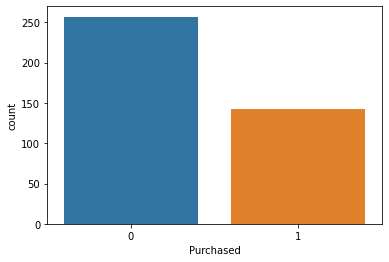

In [10]:
# Lets look at the purchased column 
sns.countplot(df.Purchased)

 By looking at data we coud say that data is balanced 

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

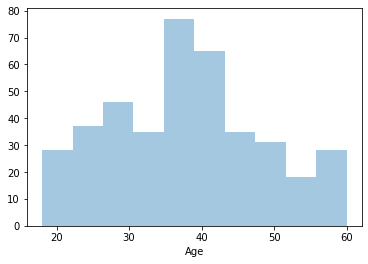

In [11]:
# lets see the column Age
sns.distplot(df.Age, kde=False)

By looing at Age distribution graph we could say that Age is almost normally distributed. The average age of customers which has bought tha Social Network Ads is between 37 to 41 years

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

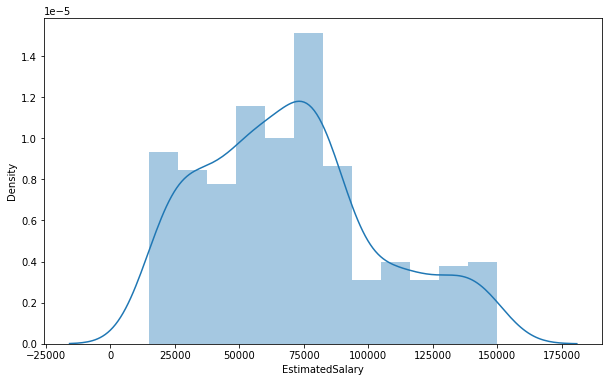

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(df.EstimatedSalary)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

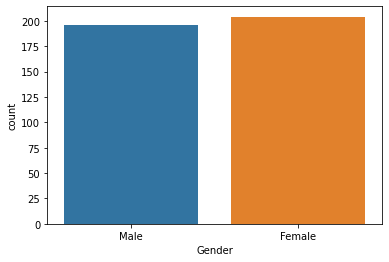

In [13]:
sns.countplot(df.Gender)

No. of male and female is almost equal

#### Bivariate analysis

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

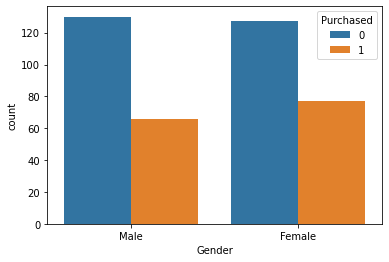

In [14]:
sns.countplot('Gender',hue='Purchased', data= df)

 Female customers purchased Social Network Ads slightly more than male

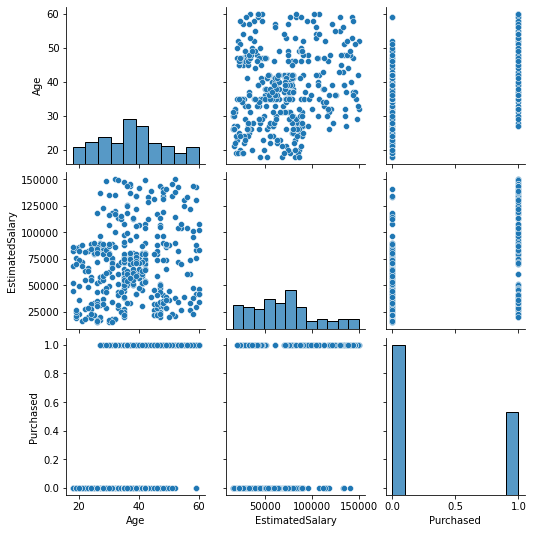

In [15]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

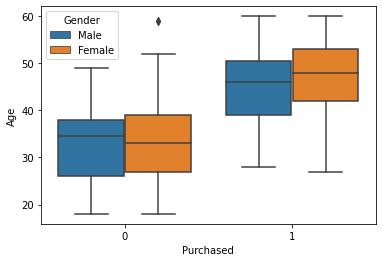

In [16]:
sns.boxplot(x='Purchased', y='Age', data=df, hue='Gender')


By looking at boxplot we could say that, The average age of feamle who has bought the Ads is around 48 years, and male is around 46 years. 

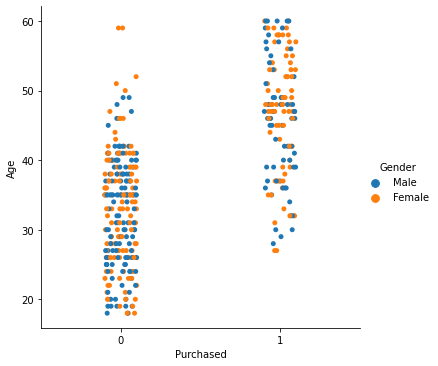

In [17]:
sns.catplot(x='Purchased', y='Age', data=df, hue='Gender')

### Feature Engineering

In [18]:
X= df.iloc[:,:3] #Independent variable
y= df.iloc[:,3] # dependent varibales
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [19]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [20]:
# 
gender=pd.get_dummies(X.Gender,drop_first=True)
gender.head()


,Male
0,1
1,1
2,0
3,0
4,1


In [21]:
X=pd.concat([X,gender],axis=1)
X.head()

,Gender,Age,EstimatedSalary,Male
0,Male,19,19000,1
1,Male,35,20000,1
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,1


In [22]:
# we will drop the Gender column
X.drop(['Gender'],inplace=True, axis=1)
X.head()

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


<AxesSubplot:>

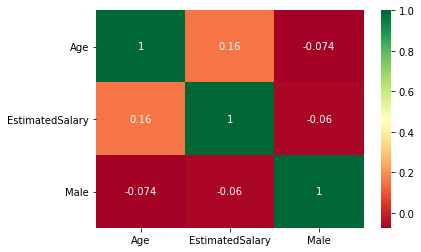

In [23]:
# Lets see teh correlation
X.corr()
sns.heatmap(X.corr(),annot = True, cmap = "RdYlGn")

## Model Building
- Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=0)


### Scalling for features

In [25]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc= sc.transform(X_test)

In [26]:
# Model builng
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train_sc,y_train)

LogisticRegression()

In [27]:
# Predicting the model
y_pred= lr.predict(X_test_sc)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [28]:
# Lets check the accuracy of the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('The accurcay of the model is:', accuracy_score(y_test,y_pred))

The accurcay of the model is: 0.9125


In [29]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[56  2]
 [ 5 17]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchased', ylabel='Density'>

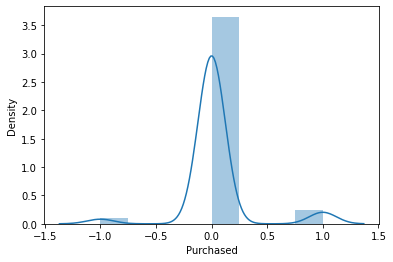

In [30]:
sns.distplot(y_test-y_pred)

### Model 2: SVM

In [31]:
from sklearn.svm import SVC
classifier= SVC()
classifier.fit(X_train_sc,y_train)

SVC()

In [32]:
y_pred= classifier.predict(X_test_sc)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [33]:
print('The accurcay of the model is:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

The accurcay of the model is: 0.95
[[55  3]
 [ 1 21]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



### Model 3: Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train_sc,y_train)

RandomForestClassifier()

In [35]:
y_pred= rf.predict(X_test_sc)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [36]:
print('The accurcay of the model is:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

The accurcay of the model is: 0.9375
[[54  4]
 [ 1 21]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.84      0.95      0.89        22

    accuracy                           0.94        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.94      0.94        80



# Stat Model

In [37]:
import statsmodels.api as sm
#adding constant term
x_train=sm.add_constant(X_train)
x_test=sm.add_constant(X_test)

In [38]:
model_train=sm.OLS(y_train,x_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Purchased   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     77.91
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           9.46e-38
Time:                        17:29:05   Log-Likelihood:                -133.86
No. Observations:                 320   AIC:                             275.7
Df Residuals:                     316   BIC:                             290.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8800      0.089     -9.877      0.000      -1.055      -0.705
Age                 0.0259      0.002     12.677      0.000       0.022       0.030
EstimatedSalary  3.877e-06   6.07e-07      6.386      0.000    2.68e-06    5.07e-06
Male               -0.0029      0.041     -0.070      0.944      -0.085       0.079
==============================================================================
Omnibus:                       17.982   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.322
Skew:                           0.017   Prob(JB):                       0.0257
Kurtosis:                       2.260   Cond. No.                     3.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
# converting into dataframe
X_train_d=pd.DataFrame(X_train)
X_train_d.head()

,Age,EstimatedSalary,Male
336,58,144000,1
64,59,83000,0
55,24,55000,0
106,26,35000,0
300,58,38000,0


In [41]:
y_train

336    1
64     0
55     0
106    0
300    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 320, dtype: int64

In [46]:
# Dropping the column Male, because the p-value is more than threshold p-value(0.05)
X_train_new= X_train_d.drop(['Male'],axis=1)
X_test_new= X_test.drop(['Male'],axis=1)

In [47]:
# Again fitting the model on new train data
lr.fit(X_train_new,y_train)

LogisticRegression()

In [48]:
#Building stat model
model_train=sm.OLS(y_train,X_train_new).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Purchased   R-squared (uncentered):                   0.521
Model:                            OLS   Adj. R-squared (uncentered):              0.518
Method:                 Least Squares   F-statistic:                              173.0
Date:                Tue, 12 Oct 2021   Prob (F-statistic):                    1.46e-51
Time:                        17:32:01   Log-Likelihood:                         -180.67
No. Observations:                 320   AIC:                                      365.3
Df Residuals:                     318   BIC:                                      372.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                 0.0082      0.001      6.388      0.000       0.006       0.011
EstimatedSalary  1.649e-06   6.55e-07      2.519      0.012    3.61e-07    2.94e-06
==============================================================================
Omnibus:                     2276.443   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.689
Skew:                           0.461   Prob(JB):                     7.27e-11
Kurtosis:                       1.371   Cond. No.                     4.22e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**After dropping the column which was not statiscally significant, we imporoved the R2 and Adj. R2 values**